In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../msd_full.csv')

df['duration'] = df['duration'] * 1000

df = df[df['year'] != 0]
df = df[df['popularity'] != 0]
df = df[df['tempo'] != 0]

df = df.dropna()

df = df.drop(columns=['danceability', 'energy'])

df.head()

,title,year,popularity,duration,key,loudness,mode,tempo,signature
0,b'Picnic (P\xc3\xa5 Kastellet) LIVE',2005,0.345802,247326.89,2,-5.347,1,88.750,4
4,b'Have Fun Storming The Castle',2008,0.597109,201873.83,7,-3.647,1,179.890,4
8,b'Final Caja Negra',1986,0.629768,337945.67,9,-4.162,1,126.305,4
10,b'Lucky',1997,0.476373,278726.08,7,-8.206,1,171.238,4
12,b'Nagging Nimbus',2004,0.454043,151300.77,0,-8.670,1,110.335,3


In [3]:
df_encoded = pd.get_dummies(df, columns=['key', 'mode', 'signature'])

df_encoded.head()

,title,year,popularity,duration,loudness,tempo,key_0,key_1,key_2,key_3,...,key_9,key_10,key_11,mode_0,mode_1,signature_1,signature_3,signature_4,signature_5,signature_7
0,b'Picnic (P\xc3\xa5 Kastellet) LIVE',2005,0.345802,247326.89,-5.347,88.750,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
4,b'Have Fun Storming The Castle',2008,0.597109,201873.83,-3.647,179.890,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
8,b'Final Caja Negra',1986,0.629768,337945.67,-4.162,126.305,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
10,b'Lucky',1997,0.476373,278726.08,-8.206,171.238,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
12,b'Nagging Nimbus',2004,0.454043,151300.77,-8.670,110.335,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [4]:
X = df_encoded[['year', 'duration', 'loudness', 'tempo'] + list(df_encoded.columns[df_encoded.columns.str.startswith('key_')]) + list(df_encoded.columns[df_encoded.columns.str.startswith('mode_')]) + list(df_encoded.columns[df_encoded.columns.str.startswith('signature_')])]
y = df_encoded['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
gbr_model = GradientBoostingRegressor(random_state=42)

gbr_model.fit(X_train_scaled, y_train)

y_pred_gbr = gbr_model.predict(X_test_scaled)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting R^2 Score: {r2_gbr}')

Gradient Boosting Mean Squared Error: 0.023570613493866736
Gradient Boosting R^2 Score: 0.04622561865909569


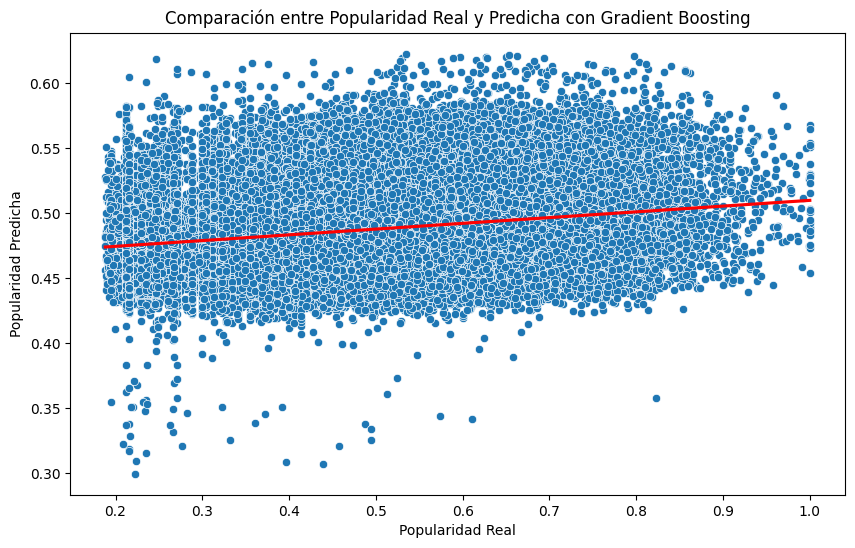

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
sns.regplot(x=y_test, y=y_pred_gbr, scatter=False, color='red', label='Regresión')
plt.xlabel('Popularidad Real')
plt.ylabel('Popularidad Predicha')
plt.title('Comparación entre Popularidad Real y Predicha con Gradient Boosting')
plt.show()